In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\Anushka\\Desktop\\VIT_DA\DE\\sales_data.csv")

print(data.head())


         Date Store ID Product ID  Units Sold  Sales Amount  Discount Applied  \
0  01-11-2024     S001       P001        50.0        500.75              10.5   
1  01-11-2024     S001       P002        75.0       1200.50               5.0   
2  01-11-2024     S002       P001        40.0        400.00               NaN   
3  01-11-2024     S002       P002         NaN        800.00              20.0   
4  02-11-2024     S001       P001        30.0           NaN              15.0   

  Customer Segment  
0          Regular  
1          Premium  
2              New  
3          Regular  
4          Regular  


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Anushka\AppData\Local\Temp\ipykernel_13200\2036498096.py:4: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("C:\\Users\\Anushka\\Desktop\\VIT_DA\DE\\sales_data.csv")


In [5]:
data.isnull().sum()

Date                 0
Store ID             0
Product ID           0
Units Sold          11
Sales Amount         9
Discount Applied    17
Customer Segment     3
dtype: int64

In [6]:
# Fill missing values

data['Units Sold'].fillna(0, inplace=True)
data['Sales Amount'].fillna(0.0, inplace=True)
data['Discount Applied'].fillna(0.0, inplace=True)
data['Customer Segment'].fillna('Unknown', inplace=True)
data.isnull().sum()

C:\Users\Anushka\AppData\Local\Temp\ipykernel_13200\884227139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Units Sold'].fillna(0, inplace=True)
C:\Users\Anushka\AppData\Local\Temp\ipykernel_13200\884227139.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Date                0
Store ID            0
Product ID          0
Units Sold          0
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64

In [8]:
# Ensure 'Units Sold' and 'Sales Amount' are numeric
data['Units Sold'] = pd.to_numeric(data['Units Sold'], errors='coerce')
data['Sales Amount'] = pd.to_numeric(data['Sales Amount'], errors='coerce')
data['Discount Applied'] = pd.to_numeric(data['Discount Applied'], errors='coerce')


In [15]:
# Handling Outliers using IQR
Q1 = data['Units Sold'].quantile(0.25)  # First quartile
Q3 = data['Units Sold'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                          # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Units Sold'] >= lower_bound) & (data['Units Sold'] <= upper_bound)]

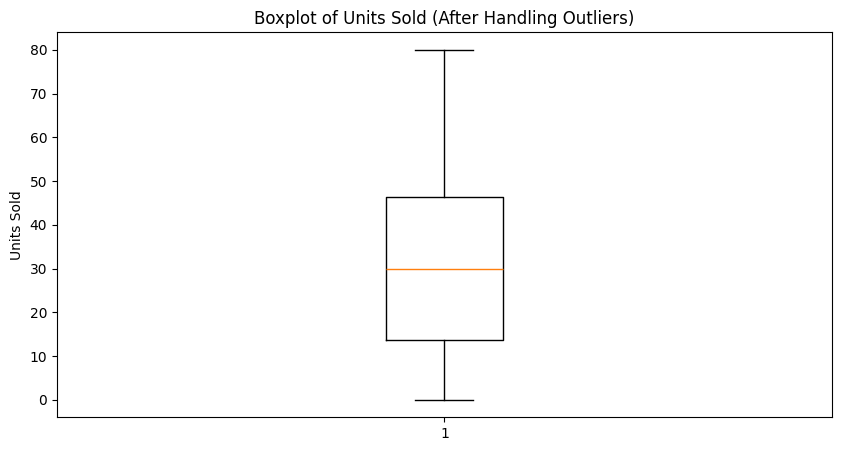

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(data['Units Sold'])
plt.title('Boxplot of Units Sold (After Handling Outliers)')
plt.ylabel('Units Sold')
plt.show()

In [18]:
# Aggregate sales data by date to calculate total sales and units sold
daily_sales = data.groupby('Date').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()

# Aggregate sales data by store to calculate total sales per store
store_sales = data.groupby('Store ID').agg({'Sales Amount': 'sum'}).reset_index()

# Aggregate sales data by product to calculate total sales and units sold per product
product_sales = data.groupby('Product ID').agg({'Sales Amount': 'sum', 'Units Sold': 'sum'}).reset_index()

In [20]:
daily_sales.head()

,Date,Sales Amount,Units Sold
0,01-11-2024,2901.25,165.0
1,02-11-2024,1300.00,115.0
2,03-11-2024,1300.00,80.0
3,04-11-2024,1700.00,115.0
4,05-11-2024,2550.00,125.0


In [21]:
store_sales.head()

,Store ID,Sales Amount
0,S001,15751.25
1,S002,7600.00


In [22]:
product_sales.head()

,Product ID,Sales Amount,Units Sold
0,P001,8150.75,880.0
1,P002,15200.50,680.0


In [23]:

# Calculate the total sales amount across all products
total_sales_per_product = product_sales['Sales Amount'].sum()
# Calculate the average sales amount per product
average_sales_per_product = product_sales['Sales Amount'].mean()

# Identify the store with the highest sales performance
top_store = store_sales.loc[store_sales['Sales Amount'].idxmax()]

# Analyze the impact of discounts on sales amounts
# Calculate the expected sales amount without discounts
data['Discount Impact'] = data['Sales Amount'] / (1 - (data['Discount Applied'] / 100))
# Calculate the correlation between discount percentage and sales amount
correlation_discount_sales = data['Discount Applied'].corr(data['Sales Amount'])

# Print the analysis results
print(f"\nTotal Sales Amount: {total_sales_per_product}")
print(f"Average Sales Amount per Product: {average_sales_per_product}")
print(f"Top Store: {top_store['Store ID']} with Sales Amount: {top_store['Sales Amount']}")
print(f"Correlation between Discounts and Sales Amount: {correlation_discount_sales}")



Total Sales Amount: 23351.25
Average Sales Amount per Product: 11675.625
Top Store: S001 with Sales Amount: 15751.25
Correlation between Discounts and Sales Amount: -0.3198577431345397


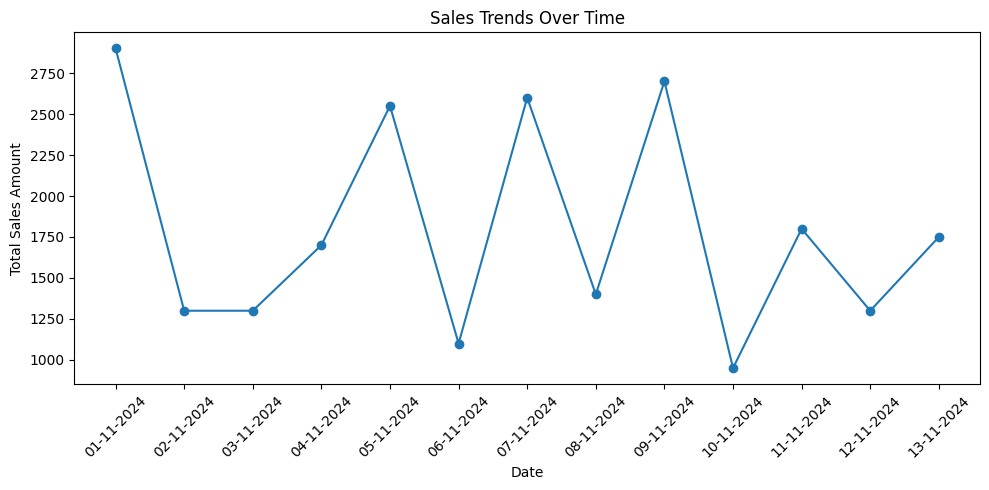

In [24]:
# Visualize sales trends over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Sales Amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


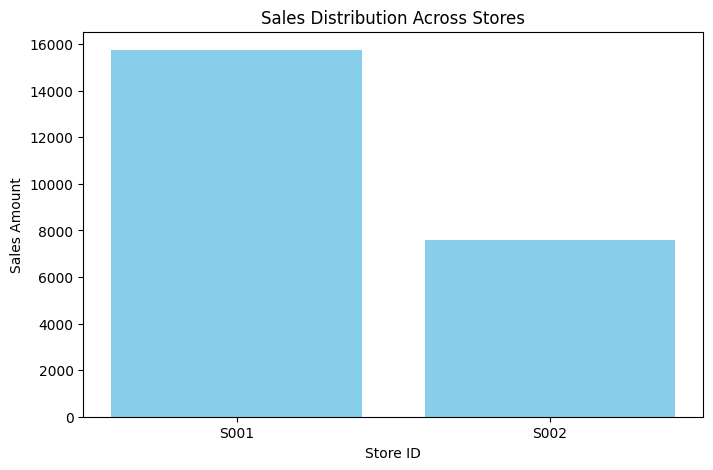

In [25]:
# Visualize sales distribution across different stores
plt.figure(figsize=(8, 5))
plt.bar(store_sales['Store ID'], store_sales['Sales Amount'], color='skyblue')
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store ID')
plt.ylabel('Sales Amount')
plt.show()


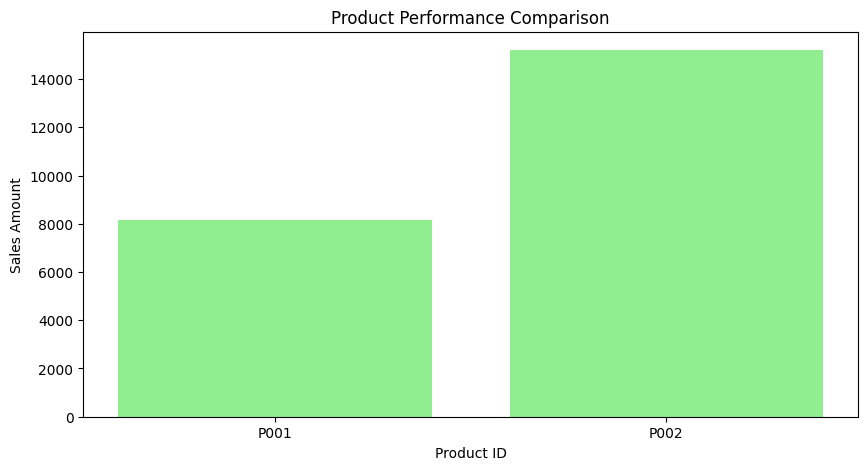

In [26]:
# Visualize performance comparison of products
plt.figure(figsize=(10, 5))
plt.bar(product_sales['Product ID'], product_sales['Sales Amount'], color='lightgreen')
plt.title('Product Performance Comparison')
plt.xlabel('Product ID')
plt.ylabel('Sales Amount')
plt.show()
